In [3]:
import pandas as pd
import numpy as np
import networkx as nx
import os
import matplotlib.pyplot as plt
from pyvis.network import Network
import seaborn as sns
import pyvis

In [4]:
path = r"C:\Users\okumb\Downloads\20th-century\.venv\Scripts\country_relationship.csv"

df_relationship = pd.read_csv(path, index_col=0)

In [5]:
df_relationship.head()

,source,target,value
0,The Russian Revolution and Communism,the Pacific 1.3.7.1 Background ...,3
1,Russians,Serbian,6
2,France,Russians,4
3,France,Russia,6
4,Germany,Russia,21


In [6]:
# Create a graph from a pandas dataframe

G = nx.from_pandas_edgelist(df_relationship, 
                            source = "source", 
                            target = "target", 
                            edge_attr = "value", 
                            create_using = nx.Graph())

#### Graph visualization - Networkx

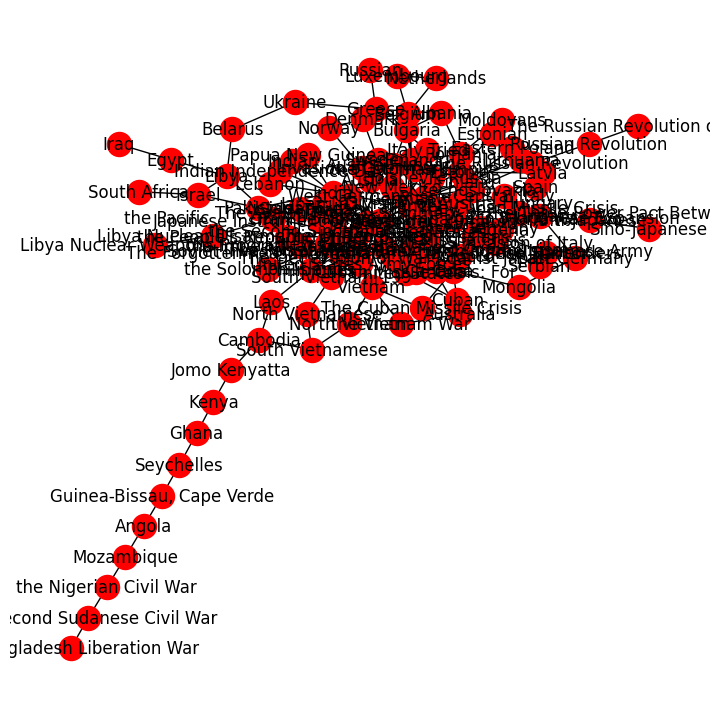

In [7]:
h = plt.figure(figsize = (7,7))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels = True, node_color = 'red', edge_cmap = plt.cm.Blues, pos = pos)
plt.show() 

In [8]:
h.savefig('networkx_plt_country.png')

#### Graph visualization - Pyvis

In [10]:
# Define net object

net = Network()
net = Network(notebook = True,width="900px", height="800px", bgcolor='#222222', font_color='white')

# Define nodes from the G object
node_degree = dict(G.degree)

# Setting up node size attributes
nx.set_node_attributes(G, node_degree, 'size')
net.from_nx(G)
net.show_buttons(filter_ = True)
net.repulsion()
net.show("country.html")

country.html


### Apply the Leiden algorithm to detect any communities within the countries

In [12]:
from cdlib import algorithms
coms = algorithms.leiden(G)

In [13]:
type(coms)

cdlib.classes.node_clustering.NodeClustering

In [14]:
new_com = coms.to_node_community_map()

In [15]:
new_com

defaultdict(list,
            {'Japanese': [0],
             'Japan': [0],
             'Japan.[93]': [0],
             'the Second Sino-Japanese War': [0],
             'Thailand': [0],
             'Singapore': [0],
             'New Guinea': [0],
             'the Solomon Islands': [0],
             'Philippines': [0],
             'United States Army Forces': [0],
             'Australian': [0],
             'Solomon Islands': [0],
             'India': [0],
             'the Imperial Japanese Navy': [0],
             'West Germany': [0],
             'Papua New Guinea': [0],
             'Indian': [0],
             'The Declaration of War Against Japan': [0],
             'Soviet Invasion of Manchuria: Finishing the Japanese Army': [0],
             'Japanese Instrument of Surrender, 1945': [0],
             'Indian Independence Day': [0],
             'Lebanon': [0],
             'Russians': [1],
             'Serbian': [1],
             'France': [1],
             'Russia': [1],

In [16]:
# Put the output from new_com into a dictionary

dict_com = {k:v[0] for k,v in new_com.items()}

In [17]:
dict_com


{'Japanese': 0,
 'Japan': 0,
 'Japan.[93]': 0,
 'the Second Sino-Japanese War': 0,
 'Thailand': 0,
 'Singapore': 0,
 'New Guinea': 0,
 'the Solomon Islands': 0,
 'Philippines': 0,
 'United States Army Forces': 0,
 'Australian': 0,
 'Solomon Islands': 0,
 'India': 0,
 'the Imperial Japanese Navy': 0,
 'West Germany': 0,
 'Papua New Guinea': 0,
 'Indian': 0,
 'The Declaration of War Against Japan': 0,
 'Soviet Invasion of Manchuria: Finishing the Japanese Army': 0,
 'Japanese Instrument of Surrender, 1945': 0,
 'Indian Independence Day': 0,
 'Lebanon': 0,
 'Russians': 1,
 'Serbian': 1,
 'France': 1,
 'Russia': 1,
 'Germany': 1,
 'Austria-Hungary': 1,
 'Bulgaria': 1,
 'the Ottoman Empire': 1,
 'Bolshevik Russia': 1,
 'Division of Austria-Hungary': 1,
 'Czechoslovakia': 1,
 'Austria': 1,
 'Spain': 1,
 'Poland': 1,
 'Albania': 1,
 'the United Kingdom': 1,
 'New Mexico': 1,
 'Romania': 1,
 'The Norway Campaign in World War Two': 1,
 'Moldovans': 1,
 'Laos': 2,
 'Cambodia': 2,
 'Jomo Kenyatta

In [18]:
# Rerun network graph with the communities as an argument

nx.set_node_attributes(G, dict_com, 'group')
com_net = Network(notebook = True, width="1300px", height="700px", bgcolor='#222222', font_color='white')
com_net.from_nx(G)
com_net.show_buttons(filter_ = True)
com_net.repulsion()
com_net.show("country_communities_leiden.html")

country_communities_leiden.html


### The most important countries in 20th-Century

In [19]:
# Degree centrality

degree_dict = nx.degree_centrality(G)
degree_dict

{'The Russian Revolution and Communism           ': 0.008547008547008548,
 'the Pacific       1.3.7.1 Background           1.3.8 Japanese Expansion         ': 0.008547008547008548,
 'Russians': 0.017094017094017096,
 'Serbian': 0.008547008547008548,
 'France': 0.08547008547008547,
 'Russia': 0.07692307692307693,
 'Germany': 0.17094017094017094,
 'Austria-Hungary': 0.017094017094017096,
 'Bulgaria': 0.03418803418803419,
 'the Ottoman Empire': 0.025641025641025644,
 'Bolshevik Russia': 0.017094017094017096,
 'Division of Austria-Hungary': 0.008547008547008548,
 'Czechoslovakia': 0.05128205128205129,
 'The Russian Revolution': 0.017094017094017096,
 'Russian Revolution': 0.017094017094017096,
 'The Russian Revolution of 1917': 0.008547008547008548,
 'Italy': 0.07692307692307693,
 'the United States': 0.10256410256410257,
 'Austria': 0.008547008547008548,
 'Spain': 0.008547008547008548,
 'Poland': 0.042735042735042736,
 'Estonia': 0.025641025641025644,
 'Latvia': 0.025641025641025644,
 'Li

In [20]:
degree_df = pd.DataFrame(degree_dict.items(), columns=['countries','centrality'])

In [21]:
degree_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

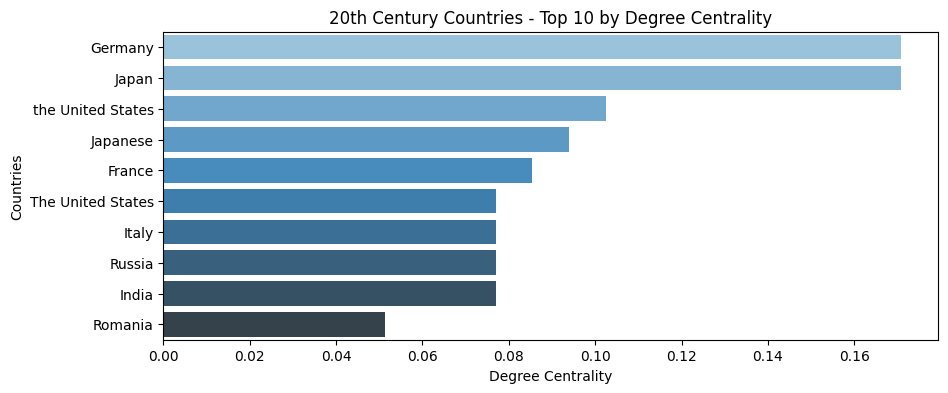

In [25]:
# Sort the DataFrame to get the top 10 countries by degree centrality
top_10_degree_df = degree_df.nlargest(10, 'centrality')

# Plotting
plt.figure(figsize=(10, 4))
sns.barplot(x="centrality", y="countries", data=top_10_degree_df, palette="Blues_d", saturation=0.9)
plt.title("20th Century Countries - Top 10 by Degree Centrality")
plt.xlabel("Degree Centrality")
plt.ylabel("Countries")
plt.show()

In [26]:
# Closeness centrality

closeness_dict = nx.closeness_centrality(G)
closeness_df = pd.DataFrame(closeness_dict.items(), columns=['countries','centrality'])

In [27]:
closeness_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

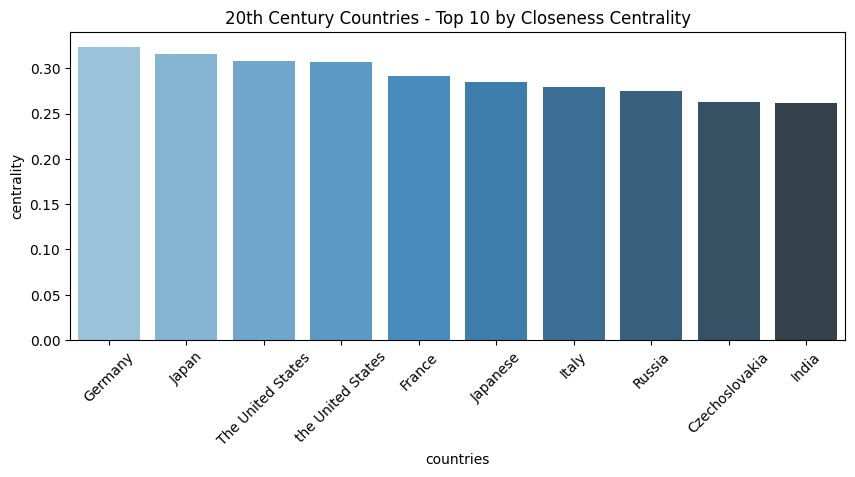

In [28]:
# Sort the DataFrame to get the top 10 countries by closeness centrality
top_10_closeness_df = closeness_df.nlargest(10, 'centrality')

# Plotting
plt.figure(figsize=(10, 4))
sns.barplot(x="countries", y="centrality", data=top_10_closeness_df, palette="Blues_d", saturation=0.9)
plt.title("20th Century Countries - Top 10 by Closeness Centrality")
plt.xlabel("countries")
plt.ylabel("centrality")
plt.xticks(rotation=45)  # Rotate x labels if they overlap
plt.show()


In [29]:
# Betweenness centrality

betweenness_dict = nx.betweenness_centrality(G)
betweennes_df = pd.DataFrame(betweenness_dict.items(), columns=['countries','centrality'])

In [30]:
betweennes_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

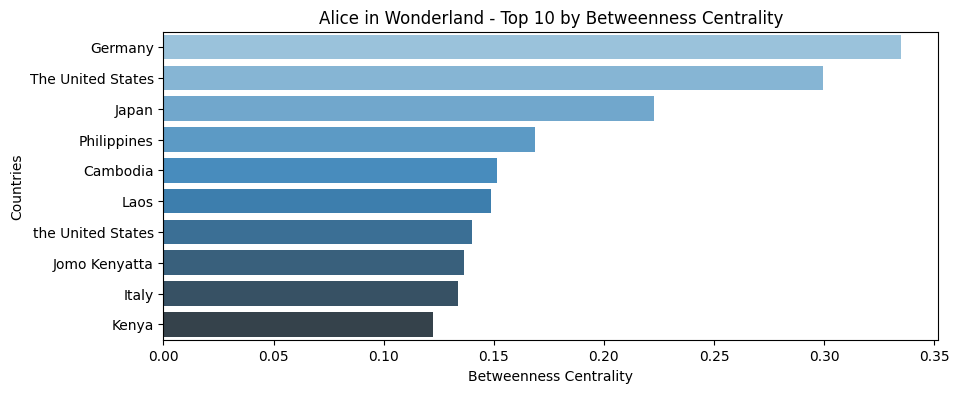

In [31]:
# Sort the DataFrame to get the top 10 characters by betweenness centrality
top_10_betweenness_df = betweennes_df.nlargest(10, 'centrality')

# Plotting
plt.figure(figsize=(10, 4))
sns.barplot(x="centrality", y="countries", data=top_10_betweenness_df, palette="Blues_d", saturation=0.9)
plt.title("Alice in Wonderland - Top 10 by Betweenness Centrality")
plt.xlabel("Betweenness Centrality")
plt.ylabel("Countries")
plt.show()

In [32]:
# Save centrality measures
nx.set_node_attributes(G, degree_dict, 'degree_centrality')
nx.set_node_attributes(G, betweenness_dict, 'betweenness_centrality')
nx.set_node_attributes(G, closeness_dict, 'closeness_centrality')